# CPSC 340: Fundamentals of Learning (demo)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

### The handwritten digits data set

Load the handwritten digits data set and display one example:

In [2]:
digits = datasets.load_digits()
X, y = digits['data'], digits['target']
n, d = X.shape
print("n=",n)
print("d=",d)

n= 1797
d= 64


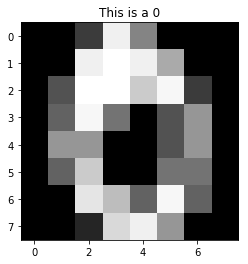

In [3]:
idx = np.random.randint(0, n) 
plt.imshow(digits['images'][idx], cmap='Greys_r')
plt.title('This is a %d' % digits['target'][idx]);

### Some EDA on feature and target values

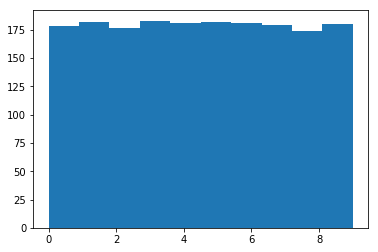

In [4]:
plt.hist(y);

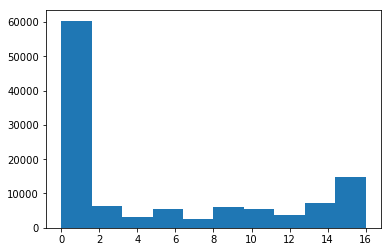

In [5]:
plt.hist(X.flatten());

### Decision stump (depth=1)

In [6]:
stump = DecisionTreeClassifier(max_depth=1)
stump.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

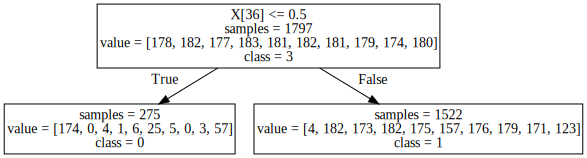

In [7]:
from sklearn.tree import export_graphviz
import graphviz # requires `conda install graphviz` and `pip install graphviz`

graphviz.Source(export_graphviz(stump, out_file=None, class_names=digits.target_names.astype(str), impurity=False))

In [8]:
yhat = stump.predict(X)
print("Error rate:", np.sum(y!=yhat)/n) # or np.mean(y!=yhat)

Error rate: 0.801892042293


(Random guessing would get us an error rate of 0.9.)

### Decision tree (depth=2)

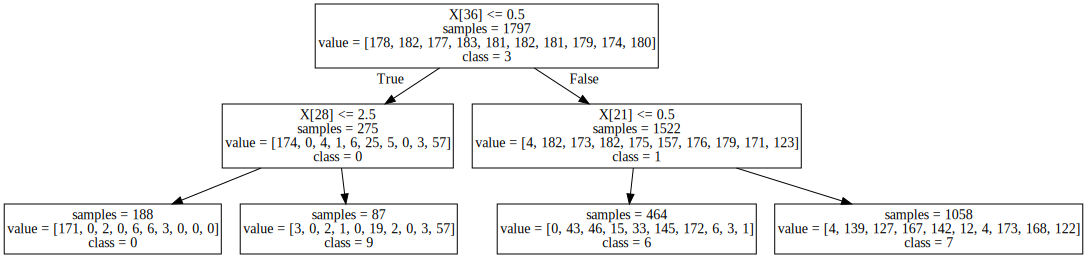

In [9]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X,y)

graphviz.Source(export_graphviz(tree, out_file=None, class_names=digits.target_names.astype(str), impurity=False))

In [10]:
yhat = tree.predict(X)
print("Error rate:", np.sum(y!=yhat)/n) # or np.mean(y!=yhat)

Error rate: 0.681135225376


### How does error rate change vs. depth?

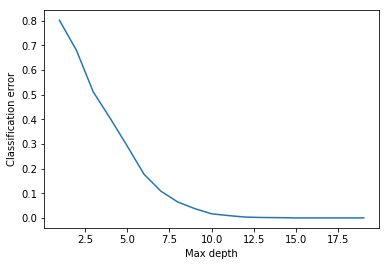

In [11]:
errors = []
depths = range(1,20)
for max_depth in depths:
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X,y)
    yhat = tree.predict(X)
    errors.append(np.mean(y!=yhat))
plt.plot(depths, errors)
plt.xlabel("Max depth")
plt.ylabel("Classification error");

In [12]:
errors[-1]

0.0

### Overfitting

- With this decision tree, "training accuracy" is 1.
- It perfectly labels the data we used to make the tree.
- We are now given features for 100 new digits.
- What is the "testing accuracy" on the new data?
- How does it do on data not used to make the tree?

In [13]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

tree = DecisionTreeClassifier(max_depth=20)
tree.fit(Xtrain,ytrain)
yhat = tree.predict(Xtrain)
train_err = np.mean(ytrain!=yhat)
print("Training error,", train_err)

Training error, 0.0


In [14]:
yhat = tree.predict(Xtest)
train_err = np.mean(ytest!=yhat)
print("Test error,", train_err)

Test error, 0.163888888889


- Overfitting: lower accuracy on new data.
- Our rules got too specific to our exact training dataset.


### Training vs. test error

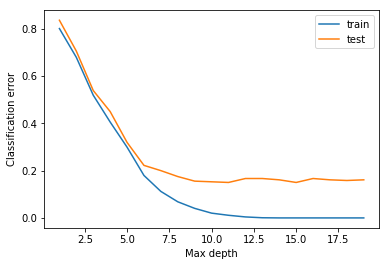

In [15]:
train_errors = []
test_errors = []
for max_depth in depths:
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(Xtrain,ytrain)
    train_errors.append(np.mean(ytrain!=tree.predict(Xtrain)))
    test_errors.append(np.mean(ytest!=tree.predict(Xtest)))
plt.plot(depths, train_errors, label="train")
plt.plot(depths, test_errors, label="test")
plt.xlabel("Max depth")
plt.ylabel("Classification error")
plt.legend();